In [25]:
# Importing libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Reading data

In [28]:
df = pd.read_csv("../EDA/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# For simplicity drop some columns
df = df.drop(["PassengerId", "Name","Sex", "Ticket", "Cabin", "Fare", "Embarked"], axis=1)

In [30]:
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [31]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [32]:
df.shape

(891, 5)

In [33]:
# Creating training, validation and test set
df = df.sample(700)
df_train = df.iloc[:450,:].sample(400)
df_val = df.iloc[450:600,:].sample(120)
df_test = df.iloc[600:,:].sample(80)

In [34]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch
176,0,3,29.699118,3,1
827,1,2,1.000000,0,2
615,1,2,24.000000,1,2
29,0,3,29.699118,0,0
334,1,1,29.699118,1,0


In [35]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch
348,1,3,3.000000,1,1
272,1,2,41.000000,0,1
727,1,3,29.699118,0,0
728,0,2,25.000000,1,0
134,0,2,25.000000,0,0


In [36]:
df_val.head()

,Survived,Pclass,Age,SibSp,Parch
545,0,1,64.000000,0,0
187,1,1,45.000000,0,0
101,0,3,29.699118,0,0
800,0,2,34.000000,0,0
758,0,3,34.000000,0,0


In [37]:
# Creating test set from validation set
X_test = df_val.iloc[:,1:].values
y_test = df_val.iloc[:,-1].values

In [40]:
X_test.shape, y_test.shape

((120, 4), (120,))

In [42]:
# Creating a function that train, predict and plot the tree and decision boundary also

In [57]:
def evaluate(clf_model, X, y):
    clf_model.fit(X, y)
    plot_tree(clf_model)
    plt.show()
    # This is only for 2D data, For M-D we need to provide filler value
    #plot_decision_regions(X.values, y.values, clf=clf_model, legend=2)
    y_pred = clf_model.predict(X_test)
    print(accuracy_score(y_test, y_pred))

# Case-1 : Bagging

In [46]:
# creating first decision tree model

In [49]:
# crating first subset of data from our train dataset
df_train1 = df_train.sample(200, replace=True)
X = df_train1.iloc[:,1:]
y = df_train1.iloc[:,-1]

In [52]:
# Building first model
dt_model1 = DecisionTreeClassifier()

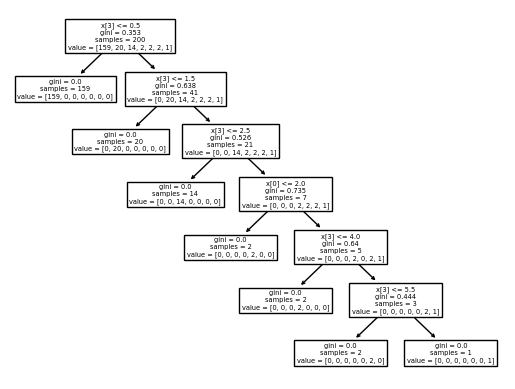

0.9916666666666667


D:\AIMLDL\venv_ai\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [58]:
# evaluating our first model
evaluate(dt_model1, X, y)

In [59]:
# Creating second decision tree

In [65]:
# crating first subset of data from our train dataset
df_train2 = df_train.sample(200, replace=True)
X2 = df_train2.iloc[:,1:]
y2 = df_train2.iloc[:,-1]

In [66]:
dt_model2 = DecisionTreeClassifier()

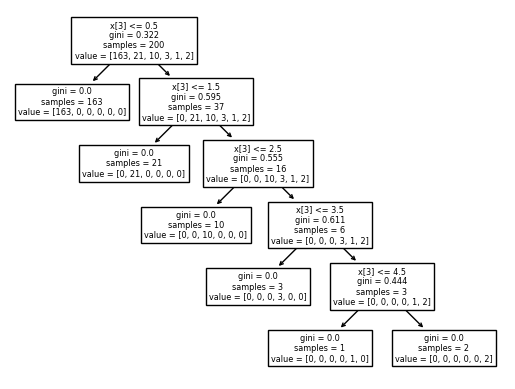

1.0


D:\AIMLDL\venv_ai\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [67]:
# evaluating our first model
evaluate(dt_model2, X2, y2)

In [64]:
# Crating third tree

In [70]:
# crating first subset of data from our train dataset
df_train3 = df_train.sample(200, replace=True)
X3 = df_train3.iloc[:,1:]
y3 = df_train3.iloc[:,-1]

In [71]:
dt_model3 = DecisionTreeClassifier()

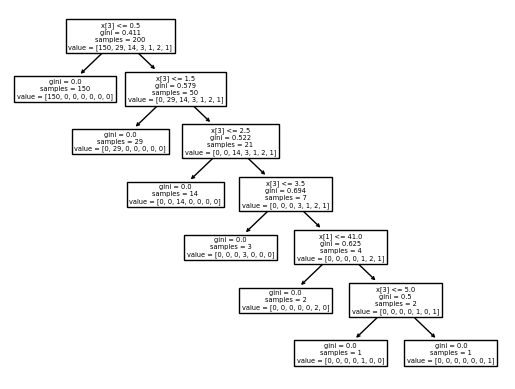

0.9916666666666667


D:\AIMLDL\venv_ai\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [73]:
# evaluating our first model
evaluate(dt_model3, X3, y3)

# Predicting or Aggrating

In [74]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch
348,1,3,3.000000,1,1
272,1,2,41.000000,0,1
727,1,3,29.699118,0,0
728,0,2,25.000000,1,0
134,0,2,25.000000,0,0


In [84]:
y_pred1 = dt_model1.predict(np.array([[2,25.00,1,0]]))
y_pred2 = dt_model2.predict(np.array([[2,25.00,1,0]]))
y_pred3 = dt_model3.predict(np.array([[2,25.00,1,0]]))

D:\AIMLDL\venv_ai\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\AIMLDL\venv_ai\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\AIMLDL\venv_ai\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [85]:
print("Predictor 1",y_pred1)
print("Predictor 2",y_pred2)
print("Predictor 3",y_pred3)

Predictor 1 [0]
Predictor 2 [0]
Predictor 3 [0]
